In [11]:
import numpy as np
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
stocks = input("Enter the code of the stock: ")
data = yf.download(stocks, "2015-01-01", "2025-12-01", auto_adjust= True)
data.head()

Enter the code of the stock:  HDFCBANK.NS


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS,HDFCBANK.NS
Date,,,,,
2015-01-01,217.235321,217.771544,215.638086,216.995739,3544940
2015-01-02,220.258682,221.171388,216.858862,216.858862,5900384
2015-01-05,218.399048,221.456603,217.931275,221.331109,4796000
2015-01-06,214.999222,218.262142,213.926790,217.680295,8219680
2015-01-07,215.626709,217.075624,213.630165,214.417377,5746112


In [13]:
data.shape
data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2695 entries, 2015-01-01 to 2025-11-28
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   (Close, HDFCBANK.NS)   2695 non-null   float64
 1   (High, HDFCBANK.NS)    2695 non-null   float64
 2   (Low, HDFCBANK.NS)     2695 non-null   float64
 3   (Open, HDFCBANK.NS)    2695 non-null   float64
 4   (Volume, HDFCBANK.NS)  2695 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 126.3 KB


In [14]:
#cannot use high and low of the day to predict the value as it will not be true prediction since we cannot knwo high and low until the day ends
data["Target"] = data["Close"].shift(-1)
data["Close_lag_1"] = data["Close"].shift(1)
data["Close_lag_5"] = data["Close"].shift(5)
data["MA_5"] = data["Close"].rolling(5).mean()
data["MA_10"] = data["Close"].rolling(10).mean()
data["Return"] = data["Close"].pct_change()
data["Volatility"] = data["Return"].rolling(5).std()
data = data.dropna()
FEATURES = [
    "Open",
    "Volume",
    "Close_lag_1",
    "Close_lag_5",
    "MA_5",
    "MA_10",
    "Volatility"
]

X= data[FEATURES]
y = data["Target"] 
split = int(len(data)*0.8)
X_train = X.iloc[:split]
X_test = X.iloc[split:]
y_train = y.iloc[:split]
y_test = y.iloc[split:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2148, 7)
(537, 7)
(2148,)
(537,)


In [15]:
from sklearn.linear_model import LinearRegression 
lr = LinearRegression()
lr.fit(X_train, y_train)
pred1 = lr.predict(X_test)

In [16]:
pred1[0]

737.4889358386026

In [17]:
print(y_test)

Date
2023-09-26     743.096130
2023-09-27     741.563049
2023-09-28     742.828430
2023-09-29     733.946472
2023-10-03     744.410217
                 ...     
2025-11-21     999.150024
2025-11-24     989.799988
2025-11-25    1003.900024
2025-11-26    1009.500000
2025-11-27    1007.599976
Name: Target, Length: 537, dtype: float64


In [18]:
from sklearn.metrics import mean_squared_error, r2_score

def calculate_metrics(y_test, pred): 
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    r2_sc = r2_score(y_test, pred)
    print("Mean Squared Error: ", mse)
    print("Root Mean Squared Error: ", rmse)
    print("R2 Score: ", r2_sc)

calculate_metrics(y_test, pred1)

Mean Squared Error:  158.84466285080967
Root Mean Squared Error:  12.60335918915309
R2 Score:  0.9834752523905734


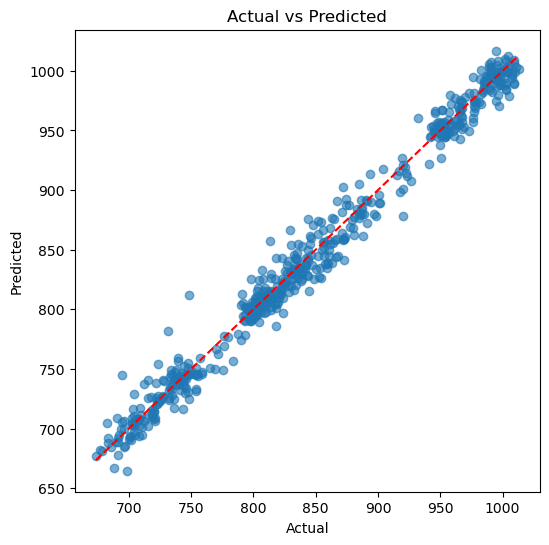

In [19]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, pred1, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

In [20]:
import joblib 
joblib.dump(lr, "HDFCBANK.NS.pkl")
model = joblib.load("HDFCBANK.NS.pkl")